In [29]:
# DECISION TREES IMPELEMENTATION

# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as pltimg
from dtreeviz.trees import dtreeviz 


In [30]:
# Training and testing data preperation
df = pd.read_csv("../Data/Dataset.csv")

In [31]:
#featureList = df.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1).columns.values.tolist()
targets = df["home_team_result"]
features = df.drop(["winner_encoded","home_team_result",],axis=1)

featuresTrain, targetsTrain = features[0:47], targets[0:47]
featuresTest, targetsTest = features[47:], targets[47:]
featuresTrain, targetsTrain = features[0:47], targets[0:47]
featuresTest, targetsTest = features[47:], targets[47:]
#Training for Decision Tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(featuresTrain, targetsTrain)

#Testing for Decision Tree
dtree.predict(featuresTest)
dtree.score(featuresTest,targetsTest)

#Running 10 times and get average of the percentage
score = []
for i in range(10):
  dtree = dtree.fit(featuresTrain, targetsTrain)
  dtree.predict(featuresTest)
  score.append(dtree.score(featuresTest,targetsTest))
print(sum(score) / 10) 


0.9176470588235295


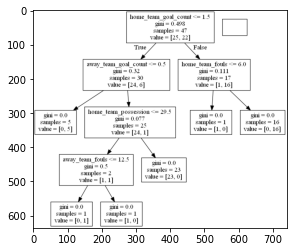

<Figure size 1080x1080 with 0 Axes>

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [32]:
# Generate graphs
df = tree.export_graphviz(dtree, out_file=None, feature_names=features.columns.values.tolist())
graph = pydotplus.graph_from_dot_data(df)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(15,15))
plt.show()
plt.savefig

In [33]:
viz = dtreeviz(dtree, featuresTrain, targetsTrain,
                target_name="target",
                feature_names=(features.columns.values.tolist()),
                class_names=[0, 1])
viz
viz.save("decision_tree.svg")